(1797, 64)


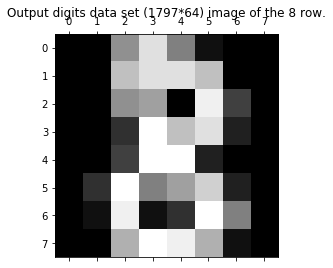

In [11]:
from sklearn.datasets import load_digits
import pylab as pl

digits=load_digits()
print(digits.data.shape) #打印出数据集的形状

pl.gray()   #灰度化
pl.matshow(digits.images[8]) #输出第8行的图片模样
pl.title('Output digits data set (1797*64) image of the 8 row.')
pl.show()

start
epoch： 0 accuracy： 0.0866666666667
epoch： 1000 accuracy： 0.688888888889
epoch： 2000 accuracy： 0.748888888889
epoch： 3000 accuracy： 0.762222222222
epoch： 4000 accuracy： 0.835555555556
epoch： 5000 accuracy： 0.893333333333
epoch： 6000 accuracy： 0.922222222222
epoch： 7000 accuracy： 0.928888888889
epoch： 8000 accuracy： 0.933333333333
epoch： 9000 accuracy： 0.94
epoch： 10000 accuracy： 0.944444444444
epoch： 11000 accuracy： 0.944444444444
epoch： 12000 accuracy： 0.948888888889
epoch： 13000 accuracy： 0.944444444444
epoch： 14000 accuracy： 0.948888888889
epoch： 15000 accuracy： 0.951111111111
epoch： 16000 accuracy： 0.955555555556
epoch： 17000 accuracy： 0.96
epoch： 18000 accuracy： 0.96
epoch： 19000 accuracy： 0.964444444444
epoch： 20000 accuracy： 0.957777777778
epoch： 21000 accuracy： 0.96
epoch： 22000 accuracy： 0.962222222222
epoch： 23000 accuracy： 0.962222222222
epoch： 24000 accuracy： 0.957777777778
epoch： 25000 accuracy： 0.962222222222
epoch： 26000 accuracy： 0.957777777778
epoch： 27000 accurac

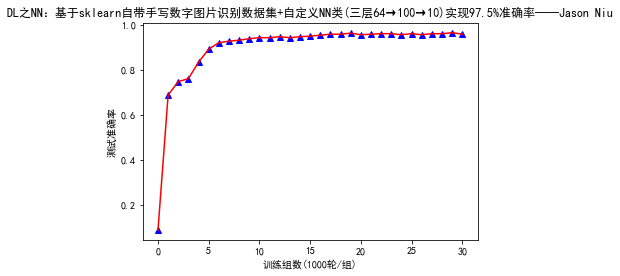

over


In [11]:
#DL之NN：基于sklearn自带手写数字图片识别数据集+自定义NN类(三层64→100→10)实现97.5%准确率
#输入64+1(偏置)个神经元，隐藏层神经元个数可以自定义，输出层10个神经元
import numpy as np  
from sklearn.datasets import load_digits              #sklearn自带数据集
from sklearn.metrics import confusion_matrix, classification_report   
from sklearn.preprocessing import LabelBinarizer      #标签二值化
from sklearn.cross_validation import train_test_split  #将数据切分分训练数据和测试数据
import matplotlib.pyplot as plt 

 
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return x*(1-x)

class NeuralNetwork:    #定义神经网络类，初始化的时候先传入一个层，
    def __init__(self,layers): #64,100,10
        self.V=np.random.random((layers[0]+1,layers[1]+1))*2-1  #权值初始化[-1,1],都要加一个偏置神经元    
        self.W=np.random.random((layers[1]+1,layers[2]))*2-1              #2个权值矩阵
    def train(self,X,y,lr=0.11,epochs=10000):
        #添加偏置，最初的数据64上需额外加入偏置列
        temp=np.ones([X.shape[0],X.shape[1]+1])   #
        temp[:,0:-1]=X #该矩阵所有行、0列到-1列
        X=temp   #通过转换行没有变，但是多了一列
        
        accuracys=[]
        for n in range(epochs+1): #加快训练的思想：T1、假如要训练10000个数据，要分批次训练(100组*100个)
            i=np.random.randint(X.shape[0])  #T2、从训练集随机选取一行数据进行训练
            x=[X[i]]
            x=np.atleast_2d(x) #将随机选取数据转为2维数据
            
            L1=sigmoid(np.dot(x,self.V)) #隐藏层输出
            L2=sigmoid(np.dot(L1,self.W)) #输出层输出
            
            L2_delta=(y[i]-L2)*dsigmoid(L2)   #Y.T就是Y的转置
            L1_delta=L2_delta.dot(self.W.T)*dsigmoid(L1)
            #改变权值的调整
            self.W +=lr*L1.T.dot(L2_delta)
            self.V +=lr*x.T.dot(L1_delta)
            
            #每训练1000次预测一次准确率
            if n%1000 ==0:
                predictions=[]
                for j in range(X_test.shape[0]):
                    o=self.predict(X_test[j])         #把测试的数据一个个放入
                    predictions.append(np.argmax(o)) #找到二值化后最大的数值即1在哪个位置
                accuracy=np.mean(np.equal(predictions,y_test)) #两者对比，再取均值
                accuracys.append(accuracy)
                print("epoch：",n,"accuracy：",accuracy)
        xdata=np.linspace(0,30,num=len(accuracys))  
        plt.figure()  
        plt.plot(xdata,accuracys,'b^')
        plt.plot(xdata,accuracys,'r')
        plt.xlabel('训练组数(1000轮/组)')
        plt.ylabel('测试准确率')

        plt.rcParams['font.sans-serif']=['SimHei']  #手动添加中文字体，或者['font.sans-serif'] = ['FangSong']  
        plt.rcParams['axes.unicode_minus'] = False  #对坐标轴的负号进行正常显示  
        plt.title('DL之NN：基于sklearn自带手写数字图片识别数据集+自定义NN类(三层64→100→10)实现97.5%准确率——Jason Niu')          #添加标题，标题默认输出英文  
        plt.show()     

                
    def predict(self,x):  #预测函数，也需要先添加偏置
        #添加偏置，最初的数据64上需额外加入偏置列
        temp=np.ones(x.shape[0]+1)   #
        temp[0:-1]=x #该矩阵的0列到-1列
        x=temp   #通过转换行没有变，但是多了一列
        x=np.atleast_2d(x) #转为2维数据

        L1=sigmoid(np.dot(x,self.V)) #隐藏层输出
        L2=sigmoid(np.dot(L1,self.W)) #输出层输出
        return L2
    
digits = load_digits()  #下载数据集
X = digits.data         #输入数据
y = digits.target       #标签
#输入数据归一化：把最初的数据都变为[0~1]之间的数据
X -= X.min()   
X /= X.max()  
nn = NeuralNetwork([64, 100, 10]) #构建神经网络，神经元个数
X_train, X_test, y_train, y_test = train_test_split(X, y)  #分割数据，75%为训练25%为测试

#对标签二值化，将输出变为神经网络的风格：比如若输出3→0001000000
labels_train = LabelBinarizer().fit_transform(y_train)  
labels_test = LabelBinarizer().fit_transform(y_test)

print ("start")  
nn.train(X_train, labels_train, epochs=30000)   
print ("over")  
